In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [ ]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [ ]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [ ]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [ ]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [ ]:
ee = solar.groupby(['hour']).mean().target

ee[:7] = 0
ee[20:] = 0
ee = ee * 2.5

In [ ]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [ ]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [ ]:
df.date_time = pd.to_datetime(df.date_time)

In [ ]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [ ]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [ ]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day

In [ ]:
eda_df['요일'] = eda_df.date_time.dt.weekday

In [ ]:
eda_df = eda_df[eda_df['요일'] < 6]

In [ ]:
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [ ]:
from math import *
import random
import sys

In [ ]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 137.7, 137.7,
                137.7, 137.7, 84.8, 84.8]

normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 107.3, 107.3,
                107.3, 107.3, 84.8, 84.8]

winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 137.9,
                137.9, 137.9, 91.8, 91.8]

winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

other_max = [11, 13, 14, 15, 16, 17]
other_mid = [8, 9, 10, 12, 18, 19, 20, 21]
other_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

price_dict = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}

time_dict = {"winter_max": winter_max, "winter_mid": winter_mid, "winter_min": winter_min,
             "spring_max": other_max, "spring_mid": other_mid, "spring_min": other_min}


In [ ]:
class Particle:
    def __init__(self, max_iter, initial_position=None):
        if initial_position:  # If an initial position is provided
            self.position = initial_position.copy()
        else:
            self.position = [0.0]*24  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(24)]  # particle current velocity
        self.best_position = [0.0]*24  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0  # iteration count
        self.max_iter = max_iter

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.5
        w_max = 1
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1
        c2 = 1.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter, initial_positions=None):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*24
        self.global_best_fitness = sys.maxsize
        if initial_positions:
            self.swarm = [Particle(max_iter, initial_position=pos) for pos in initial_positions]
        else:
            self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
        return self.global_best_position, self.global_best_fitness

def compute_group_mean(data, prices):
    price_groups = {}
    # Group data by prices
    for d, p in zip(data, prices):
        if p not in price_groups:
            price_groups[p] = []
        price_groups[p].append(d)
    # Compute mean for each group
    group_means = {k: np.mean(v) for k, v in price_groups.items()}
    return group_means


def find_peak_group(season_price, power_use):
    # Create a dictionary to map price to hours
    price_to_hours = {}
    for hour, price in enumerate(season_price):
        if price not in price_to_hours:
            price_to_hours[price] = []
        price_to_hours[price].append(hour)
    
    # Identify the group with the highest power use
    max_power = -float('inf')
    peak_group = None
    for price, hours in price_to_hours.items():
        total_power = sum([power_use[hour] for hour in hours])
        if total_power > max_power:
            max_power = total_power
            peak_group = hours

    return peak_group


def fitness_func(position, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        if cumulative_used > cumulative_generated:  # Cannot use more than generated
            return sys.maxsize
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]

        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
    return total_cost

def variance_fitness_func_with_group_mean(position, base_cost, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        
        if cumulative_used > cumulative_generated:
            return sys.maxsize
        
        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]
    
    if total_cost > base_cost:
        return sys.maxsize
    
    group_means = compute_group_mean(consumption_pattern, season_price)
    peak_group = find_peak_group(season_price, power_use)
    
    weighted_deviation = sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in peak_group])

    # peak_weight = 0.8  
    # total_deviation = (peak_weight * weighted_deviation) + (1 - peak_weight) * sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in range(24) if i not in peak_group])

    return weighted_deviation

def cal_price_with_variance_optimization_updated(power_generated, power_use, weather):
    bounds = [(0, power_use[i] * 0.8) for i in range(24)]
    initial_positions = [(power_generated*0.5).tolist() if i < 125 else [0]*24 for i in range(250)] 
    pso_price = PSO(lambda x: fitness_func(x, weather, power_generated, power_use), bounds, num_particles = 200, max_iter = 1000, initial_positions=initial_positions)
    best_position_price, best_fitness_price = pso_price.run_result()
    
    initial_positions_variance = [best_position_price for _ in range(200)]
    pso_variance = PSO(lambda x: variance_fitness_func_with_group_mean(x, best_fitness_price, weather, power_generated, power_use), 
                       bounds, num_particles=200, max_iter=1000, initial_positions=initial_positions_variance)
    best_position_variance, _ = pso_variance.run_result()
    
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    best_fitness_price = np.dot(np.array(power_use) - np.array(best_position_variance), weather_price[weather])
    before_price = np.dot(power_use, weather_price[weather])
    before_optimal_price = np.dot(np.array(power_use) - np.array(power_generated), weather_price[weather])

    return best_position_variance, best_fitness_price, before_optimal_price, before_price




In [ ]:
using = [1735.22558912, 1692.90378425, 1666.60942472, 1633.57393765,
       1617.61366307, 1648.86508108, 1734.7991391 , 1899.72908325,
       2122.85455022, 2338.61845383, 2510.15136875, 2525.4701233 ,
       2528.12289007, 2533.74891152, 2540.86959113, 2536.0931445 ,
       2521.54245219, 2439.14067532, 2287.51492254, 2184.60913869,
       2063.78559294, 1904.35326784, 1788.63632033, 1780.4262118 ]

solar = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  124.03086265,
        338.65378978,  649.46583908,  934.12122216, 1145.87171128,
       1224.68194677, 1202.18163322, 1069.21578177,  838.69461399,
        512.95469621,  233.04044732,   82.51842252,   39.37393395,
          0.        ,    0.        ,    0.        ,    0.        ]

weather_list = ['spring', 'summer', 'fall', 'winter']
for i in weather_list:
    best_position, best_fitness, before_optimal_price, before_price = cal_price_with_variance_optimization_updated(solar, using, i)

    print(i, best_fitness, before_optimal_price, before_price)

    print('before optimal ',i, np.dot(np.array(using) - np.array(solar), price_dict[i]))
    print('after optimal ', i, np.dot(np.array(using) - np.array(best_position), price_dict[i]))

    print('save money ', i, np.dot(np.array(using) - np.array(solar), price_dict[i]) - np.dot(np.array(using) - np.array(best_position), price_dict[i]))


In [ ]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [ ]:
input[input['num']==1].groupby(['hour']).mean()

,num,전력사용량(kWh),year,day
hour,,,,
0,1.0,8538.225534,2020.0,14.780822
1,1.0,8513.415123,2020.0,14.780822
2,1.0,8505.843288,2020.0,14.780822
3,1.0,8490.397808,2020.0,14.780822
4,1.0,8476.372603,2020.0,14.780822
5,1.0,8451.748603,2020.0,14.780822
6,1.0,8444.664986,2020.0,14.780822
7,1.0,8475.120986,2020.0,14.780822
8,1.0,8491.489644,2020.0,14.780822


In [ ]:
import pvlib

In [ ]:
longitude = 128.5647
latitude = 38.2509

In [ ]:
price_dict.keys()

dict_keys(['winter', 'spring', 'summer', 'fall'])

In [ ]:
weather_dict = {'winter' : '2018-12-01' , 'spring' : '2019-04-01' , 'summer' : '2019-07-01' , 'fall' : '2019-10-01'}

In [ ]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start=weather_dict['fall'], 
                      end = pd.Timestamp(weather_dict['fall']) + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 5000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 5000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-10-01 00:00:00+09:00       0.000000
2019-10-01 01:00:00+09:00       0.000000
2019-10-01 02:00:00+09:00       0.000000
2019-10-01 03:00:00+09:00       0.000000
2019-10-01 04:00:00+09:00       0.000000
2019-10-01 05:00:00+09:00       0.000000
2019-10-01 06:00:00+09:00       0.000000
2019-10-01 07:00:00+09:00       0.000000
2019-10-01 08:00:00+09:00     133.819149
2019-10-01 09:00:00+09:00     557.961084
2019-10-01 10:00:00+09:00     932.394896
2019-10-01 11:00:00+09:00    1142.759519
2019-10-01 12:00:00+09:00    1214.764212
2019-10-01 13:00:00+09:00    1193.541606
2019-10-01 14:00:00+09:00    1061.676176
2019-10-01 15:00:00+09:00     769.047317
2019-10-01 16:00:00+09:00     341.772910
2019-10-01 17:00:00+09:00       6.756225
2019-10-01 18:00:00+09:00       0.000000
2019-10-01 19:00:00+09:00       0.000000
2019-10-01 20:00:00+09:00       0.000000
2019-10-01 21:00:00+09:00       0.000000
2019-10-01 22:00:00+09:00       0.000000
2019-10-01 23:00:00+09:00       0.000000
Freq: H, Name: p

In [ ]:
def generation_model(weather, capacity):
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

    # 일일 일사량을 구합니다.
    times = pd.date_range(start=weather_dict[weather], 
                        end = pd.Timestamp(weather_dict[weather]) + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                        freq='1H', tz='Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    # Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')

    # 발전량을 계산합니다.
    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(solis_clearsky)

    return mc.results.ac

In [ ]:
optimal_df = pd.read_csv('./paper_table_4.csv')

In [ ]:
optimal_df

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice
0,spring,1000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3967327811...",2.145274e+07,2.147078e+07,2.167859e+07
1,spring,2000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 738.20...",2.122688e+07,2.126297e+07,2.167859e+07
2,spring,3000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1210.3221471...",2.100102e+07,2.105515e+07,2.167859e+07
3,spring,4000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1898.7674537...",2.077517e+07,2.084734e+07,2.167859e+07
4,spring,5000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5236.4...",2.054931e+07,2.063952e+07,2.167859e+07
...,...,...,...,...,...,...,...
1235,winter,6000,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 372.81044296185...",2.830110e+06,2.882000e+06,3.534904e+06
1236,winter,7000,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0158506685576931...",2.773183e+06,2.773183e+06,3.534904e+06
1237,winter,8000,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 72.8125864713494, ...",2.630436e+06,2.664366e+06,3.534904e+06
1238,winter,9000,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 641.98984765566...",2.530514e+06,2.555549e+06,3.534904e+06


In [ ]:
test_company = [48, 6, 41, 17, 28, 15, 1, 50, 58]

In [ ]:
weather_list = ['spring', 'summer', 'fall', 'winter']
results = []  # 결과를 저장할 리스트
solar_none_list = eda_df[eda_df['태양광보유']==0].num.unique()

for weather in tqdm(weather_list):
    for i in tqdm(range(len(test_company))):
        using = input[input['num']==test_company[i]].groupby(['hour']).mean()['전력사용량(kWh)'].values

        for j in range(1000, 10100, 2000):
            solar = generation_model(weather, j)
            best_position, best_fitness, before_optimal_price, before_price = cal_price_with_variance_optimization_updated(solar, using, weather)
            for _ in range(30):
                new_position, new_fitness, new_before_optimal_price, new_before_price = cal_price_with_variance_optimization_updated(solar, using, weather)
                if new_fitness < best_fitness:
                    best_position, best_fitness, before_optimal_price, before_price = new_position, new_fitness, new_before_optimal_price, new_before_price
            
            results.append((weather, j, test_company[i], best_position, best_fitness, before_optimal_price, before_price))

df_results = pd.DataFrame(results, columns=['Weather', 'Capacity', 'Company', 'BestPosition', 'BestFitness', 'BeforeOptimalPrice', 'BeforePrice'])


100%|██████████| 4/4 [72:15:24<00:00, 65031.14s/it]   


In [ ]:
df_results.to_csv('./paper_table_6.csv', encoding='cp949', index=False)

In [ ]:
df_results['optimal_rate'] = (df_results['BeforeOptimalPrice']-df_results['BestFitness'])/df_results['BeforeOptimalPrice']*100

In [ ]:
df_results['save_price'] = df_results['BeforeOptimalPrice'] - df_results['BestFitness']

In [ ]:
spring_df = df_results[df_results['Weather']=='spring']
summer_df = df_results[df_results['Weather']=='summer']
fall_df = df_results[df_results['Weather']=='fall']
winter_df = df_results[df_results['Weather']=='winter']

In [ ]:
spring_df

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
0,spring,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104.94546736...",3.275746e+06,3.293788e+06,3.501602e+06,0.547785,18042.887052
1,spring,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1715.7780191...",2.824032e+06,2.878160e+06,3.501602e+06,1.880669,54128.661156
2,spring,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1607.9846661...",2.372318e+06,2.462532e+06,3.501602e+06,3.663482,90214.435260
3,spring,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 10.410309787869043, 0...",1.957958e+06,2.046904e+06,3.501602e+06,4.345423,88946.658549
4,spring,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1206.190149349306,...",1.606734e+06,1.631276e+06,3.501602e+06,1.504496,24542.484601
5,spring,1000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25.718879170...",3.294136e+06,3.312178e+06,3.519992e+06,0.544744,18042.887052
6,spring,3000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1724.5...",2.842422e+06,2.896550e+06,3.519992e+06,1.868728,54128.661156
7,spring,5000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1675.6037260...",2.390708e+06,2.480922e+06,3.519992e+06,3.636326,90214.435260
8,spring,7000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 32.263303622473046...",1.981007e+06,2.065294e+06,3.519992e+06,4.081133,84287.411733
9,spring,9000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1319.1498621450603...",1.629783e+06,1.649666e+06,3.519992e+06,1.205288,19883.237786


for i in solar_none_list:
    spring_df[spring_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'spring' + str(i))
    plt.show()
    summer_df[summer_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'summer' + str(i))
    plt.show()
    fall_df[fall_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'fall' + str(i))
    plt.show()
    winter_df[winter_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'winter' + str(i))
    plt.show()

In [ ]:
len(np.where(df_results.optimal_rate <0)[0])

17

In [ ]:
len(df_results)

180

In [ ]:
len(np.where(df_results.optimal_rate <0)[0])/len(df_results)

0.09444444444444444

<Axes: xlabel='Capacity'>

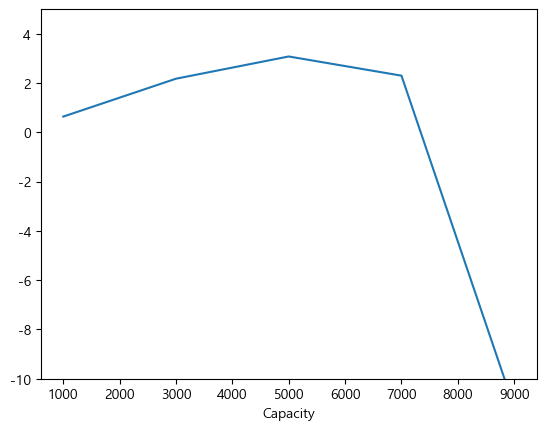

In [ ]:
df_results.groupby(['Capacity']).mean().optimal_rate.plot(ylim=[-10,5])

In [ ]:
df_results.Company.unique()

array([48,  6, 41, 17, 28, 15,  1, 50, 58], dtype=int64)

In [ ]:
print('봄 최적화 결과 (-) ', spring_df[spring_df['optimal_rate']<0].optimal_rate.mean())
print('여름 최적화 결과 (-) ', summer_df[summer_df['optimal_rate']<0].optimal_rate.mean())
print('가을 최적화 결과 (-) ', fall_df[fall_df['optimal_rate']<0].optimal_rate.mean())
print('겨울 최적화 결과 (-) ', winter_df[winter_df['optimal_rate']<0].optimal_rate.mean())

봄 최적화 결과 (-)  -36.97269995494988
여름 최적화 결과 (-)  -22.759903790142875
가을 최적화 결과 (-)  -27.308566533889895
겨울 최적화 결과 (-)  nan


In [ ]:
print('봄 최적화 결과 (+) ', spring_df[spring_df['optimal_rate']>0].optimal_rate.mean())
print('여름 최적화 결과 (+) ', summer_df[summer_df['optimal_rate']>0].optimal_rate.mean())
print('가을 최적화 결과 (+) ', fall_df[fall_df['optimal_rate']>0].optimal_rate.mean())
print('겨울 최적화 결과 (+) ', winter_df[winter_df['optimal_rate']>0].optimal_rate.mean())

봄 최적화 결과 (+)  1.7317211942614026
여름 최적화 결과 (+)  4.051421803360554
가을 최적화 결과 (+)  1.9919698197358386
겨울 최적화 결과 (+)  2.110152834031351


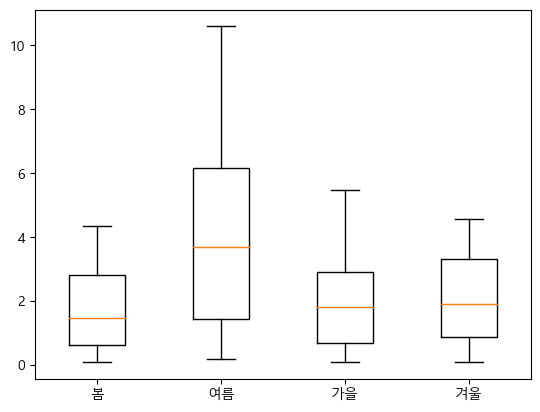

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df[spring_df['optimal_rate']>0].optimal_rate, 
             summer_df[summer_df['optimal_rate']>0].optimal_rate,
             fall_df[fall_df['optimal_rate']>0].optimal_rate,
             winter_df[winter_df['optimal_rate']>0].optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

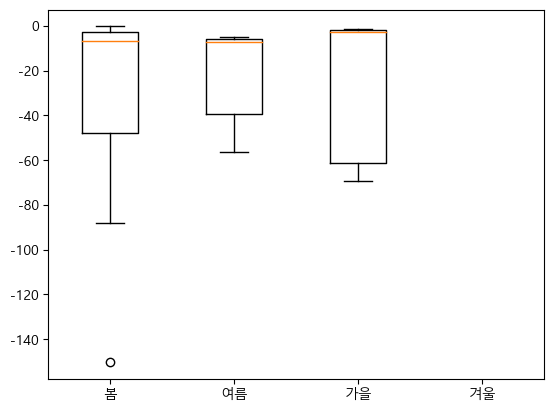

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df[spring_df['optimal_rate']<0].optimal_rate, 
             summer_df[summer_df['optimal_rate']<0].optimal_rate,
             fall_df[fall_df['optimal_rate']<0].optimal_rate,
             winter_df[winter_df['optimal_rate']<0].optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

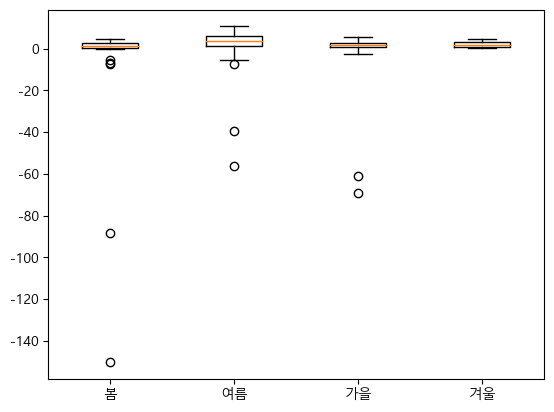

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df.optimal_rate, 
             summer_df.optimal_rate,
             fall_df.optimal_rate,
             winter_df.optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

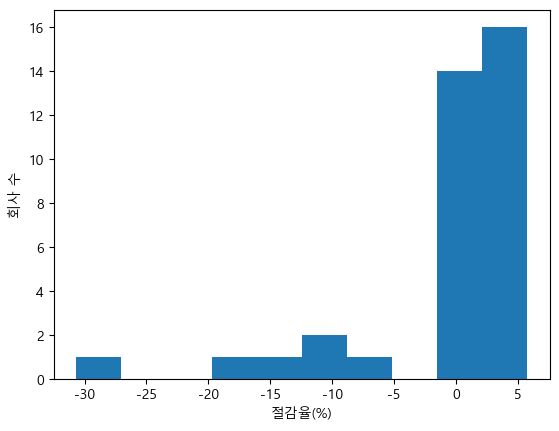

In [ ]:
plt.hist(df_results.groupby(['Company','Weather']).mean()['optimal_rate'])
plt.xlabel('절감율(%)')
plt.ylabel('회사 수')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'spring')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'summer')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'fall')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'winter')].optimal_rate
])
plt.ylim([-5,10])
plt.ylabel('절감율(%)', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 18)
plt.xlabel('계절', fontsize = 18)
plt.show()

In [ ]:
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'spring')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'summer')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'fall')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'winter')].optimal_rate.describe())

count    27.000000
mean      1.477258
std       1.225968
min      -0.203385
25%       0.546265
50%       1.025050
75%       2.135725
max       3.697992
Name: optimal_rate, dtype: float64
-------------------------------------
count    27.000000
mean      3.172217
std       2.451195
min       0.174260
25%       1.052976
50%       2.227094
75%       4.451018
max       9.057655
Name: optimal_rate, dtype: float64
-------------------------------------
count    27.000000
mean      1.521405
std       1.168915
min       0.081101
25%       0.527492
50%       1.062610
75%       2.202853
max       4.320455
Name: optimal_rate, dtype: float64
-------------------------------------
count    27.000000
mean      1.685998
std       1.215191
min       0.098071
25%       0.598763
50%       1.793236
75%       2.425622
max       4.121928
Name: optimal_rate, dtype: float64


In [ ]:
df_results

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
0,spring,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104.94546736...",3.275746e+06,3.293788e+06,3.501602e+06,0.547785,18042.887052
1,spring,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1715.7780191...",2.824032e+06,2.878160e+06,3.501602e+06,1.880669,54128.661156
2,spring,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1607.9846661...",2.372318e+06,2.462532e+06,3.501602e+06,3.663482,90214.435260
3,spring,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 10.410309787869043, 0...",1.957958e+06,2.046904e+06,3.501602e+06,4.345423,88946.658549
4,spring,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1206.190149349306,...",1.606734e+06,1.631276e+06,3.501602e+06,1.504496,24542.484601
...,...,...,...,...,...,...,...,...,...
175,winter,1000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.8928823568973...",3.016108e+06,3.042799e+06,3.151616e+06,0.877164,26690.324623
176,winter,3000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.7338470294002712...",2.745093e+06,2.825164e+06,3.151616e+06,2.834206,80070.973868
177,winter,5000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216.48866682437...",2.500049e+06,2.607530e+06,3.151616e+06,4.121928,107480.502247
178,winter,7000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 16.904445282694407...",2.312016e+06,2.389895e+06,3.151616e+06,3.258684,77879.132414


In [ ]:
df_results.Company.unique()

array([48,  6, 41, 17, 28, 15,  1, 50, 58], dtype=int64)

In [ ]:
df_results_eda = df_results[df_results['Capacity'] < 8000]

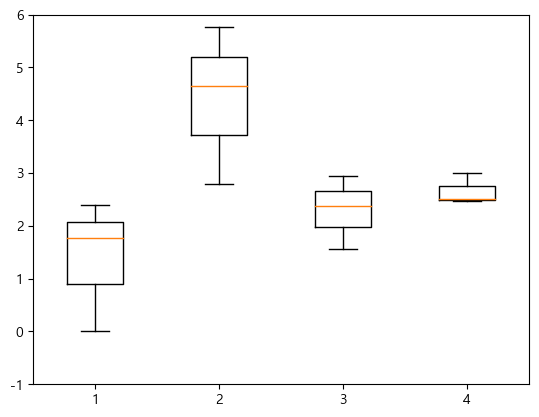

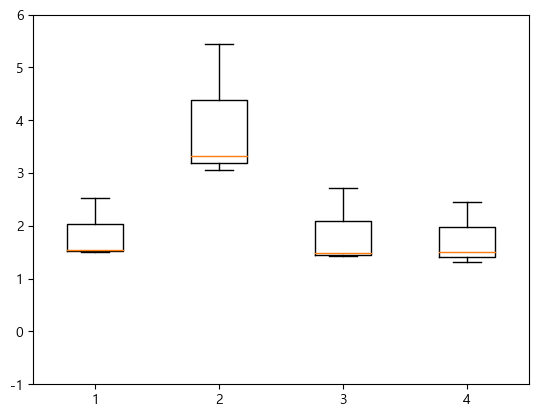

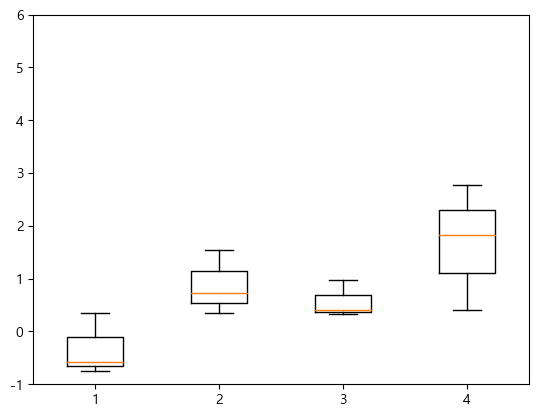

In [ ]:
plt.boxplot([
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()

plt.boxplot([
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()

plt.boxplot([
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()




[1, 2, 3, 4, 5]

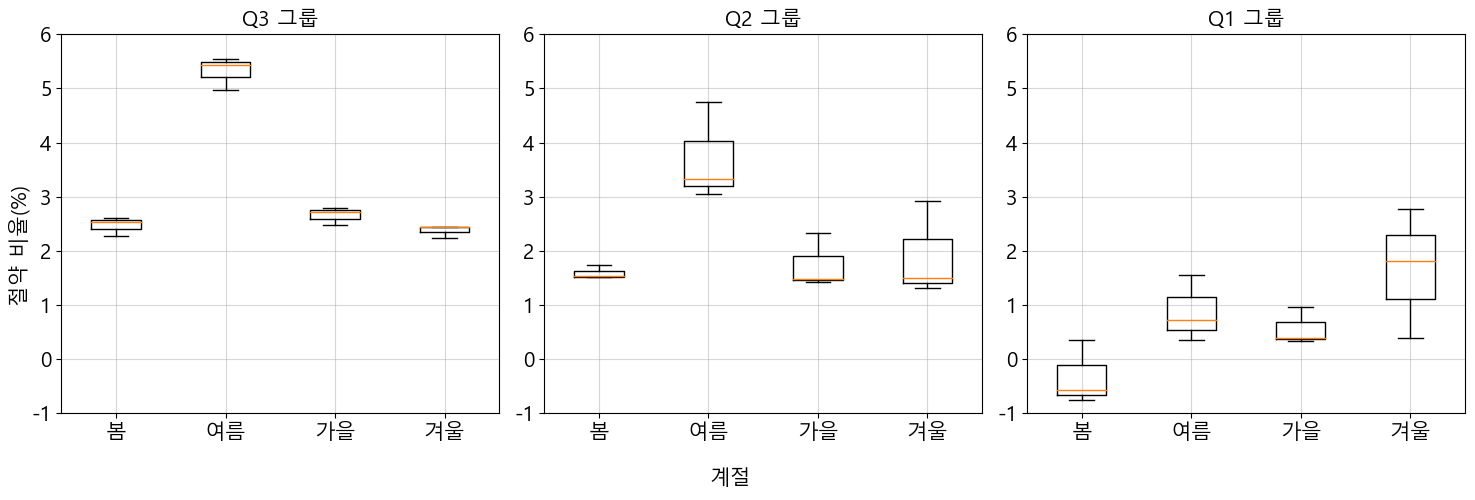

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].boxplot([
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[0].set_ylim([-1, 6])
ax[0].set_title('Q3 그룹', fontsize = 15)
ax[0].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[0].grid(alpha = 0.5)
ax[0].tick_params(axis='y', labelsize = 15)

ax[1].boxplot([
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[1].set_ylim([-1, 6])
ax[1].set_title('Q2 그룹', fontsize = 15)
ax[1].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[1].grid(alpha = 0.5)
ax[1].tick_params(axis='y', labelsize = 15)

ax[2].boxplot([
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[2].set_ylim([-1, 6])
ax[2].set_title('Q1 그룹', fontsize = 15)
ax[2].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[2].grid(alpha = 0.5)
ax[2].tick_params(axis='y', labelsize = 15)

fig.supxlabel('계절', fontsize = 15) 
fig.supylabel('절약 비율(%)', fontsize = 15)

plt.tight_layout()
plt.show()

In [ ]:
df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate.mean()

3.2073656601238985

In [ ]:
df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate.mean()

2.239900316978862

In [ ]:
df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate.mean()

0.6969430297019729

In [ ]:
df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company','Capacity']).mean()['optimal_rate'][:18]

Weather  Company  Capacity
fall     1        1000        0.081101
                  3000        0.247578
                  5000        0.420009
         6        1000        0.522759
                  3000        1.764677
                  5000        3.362183
         15       1000        0.316703
                  3000        1.018801
                  5000        1.830336
         17       1000        0.631679
                  3000        2.189486
                  5000        4.320455
         28       1000        0.304820
                  3000        0.977924
                  5000        1.751422
         41       1000        0.529327
                  3000        1.789662
                  5000        3.416712
Name: optimal_rate, dtype: float64

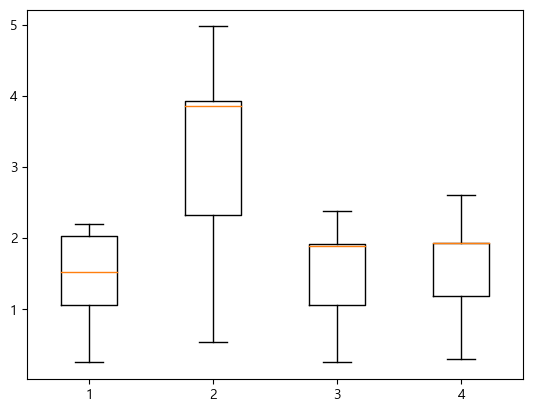

In [ ]:
plt.boxplot([
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][9:18],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][18:27],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][:9],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][27:36],
])
plt.show()

In [ ]:
df_results.optimal_rate.argmax()

48

In [ ]:
df_results[:49]

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
0,spring,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104.94546736...",3.275746e+06,3.293788e+06,3.501602e+06,0.547785,18042.887052
1,spring,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1715.7780191...",2.824032e+06,2.878160e+06,3.501602e+06,1.880669,54128.661156
2,spring,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1607.9846661...",2.372318e+06,2.462532e+06,3.501602e+06,3.663482,90214.435260
3,spring,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 10.410309787869043, 0...",1.957958e+06,2.046904e+06,3.501602e+06,4.345423,88946.658549
4,spring,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1206.190149349306,...",1.606734e+06,1.631276e+06,3.501602e+06,1.504496,24542.484601
5,spring,1000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25.718879170...",3.294136e+06,3.312178e+06,3.519992e+06,0.544744,18042.887052
6,spring,3000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1724.5...",2.842422e+06,2.896550e+06,3.519992e+06,1.868728,54128.661156
7,spring,5000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1675.6037260...",2.390708e+06,2.480922e+06,3.519992e+06,3.636326,90214.435260
8,spring,7000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 32.263303622473046...",1.981007e+06,2.065294e+06,3.519992e+06,4.081133,84287.411733
9,spring,9000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1319.1498621450603...",1.629783e+06,1.649666e+06,3.519992e+06,1.205288,19883.237786


In [ ]:
weather_dict['summer']

'2019-07-01'

In [ ]:
pd.Timestamp(weather_dict['fall'])

Timestamp('2019-10-01 00:00:00')

In [ ]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start='2019-09-05', 
                      end = pd.Timestamp('2019-09-05') + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 7000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 7000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-09-05 00:00:00+09:00       0.000000
2019-09-05 01:00:00+09:00       0.000000
2019-09-05 02:00:00+09:00       0.000000
2019-09-05 03:00:00+09:00       0.000000
2019-09-05 04:00:00+09:00       0.000000
2019-09-05 05:00:00+09:00       0.000000
2019-09-05 06:00:00+09:00       0.000000
2019-09-05 07:00:00+09:00       0.000000
2019-09-05 08:00:00+09:00     334.297326
2019-09-05 09:00:00+09:00     931.366851
2019-09-05 10:00:00+09:00    1385.114286
2019-09-05 11:00:00+09:00    1586.743072
2019-09-05 12:00:00+09:00    1623.649335
2019-09-05 13:00:00+09:00    1622.876036
2019-09-05 14:00:00+09:00    1567.068971
2019-09-05 15:00:00+09:00    1321.960197
2019-09-05 16:00:00+09:00     825.803260
2019-09-05 17:00:00+09:00     235.668883
2019-09-05 18:00:00+09:00       0.000000
2019-09-05 19:00:00+09:00       0.000000
2019-09-05 20:00:00+09:00       0.000000
2019-09-05 21:00:00+09:00       0.000000
2019-09-05 22:00:00+09:00       0.000000
2019-09-05 23:00:00+09:00       0.000000
Freq: H, Name: p

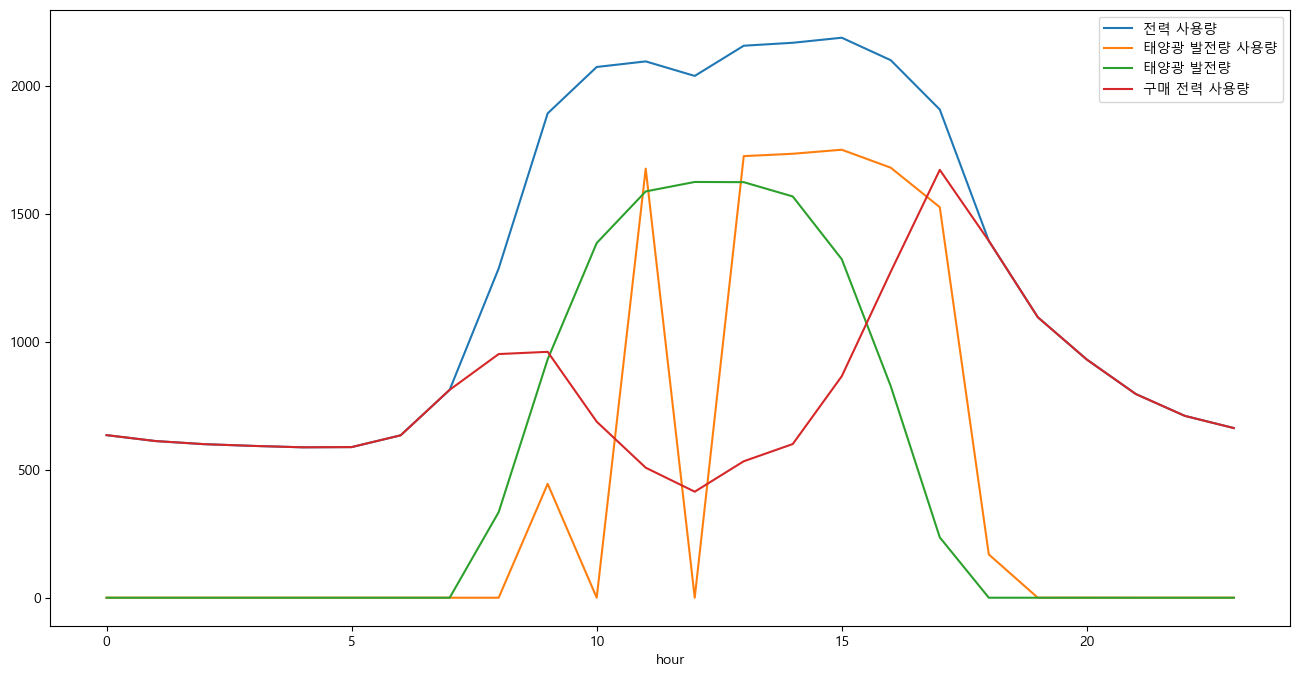

In [ ]:
plt.figure(figsize = (16,8))
input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].plot()
plt.plot(df_results.loc[53]['BestPosition'])
plt.plot(mc.results.ac.values)
plt.plot(input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'] - mc.results.ac.values)
plt.legend(['전력 사용량', '태양광 발전량 사용량', '태양광 발전량', '구매 전력 사용량'])

plt.show()

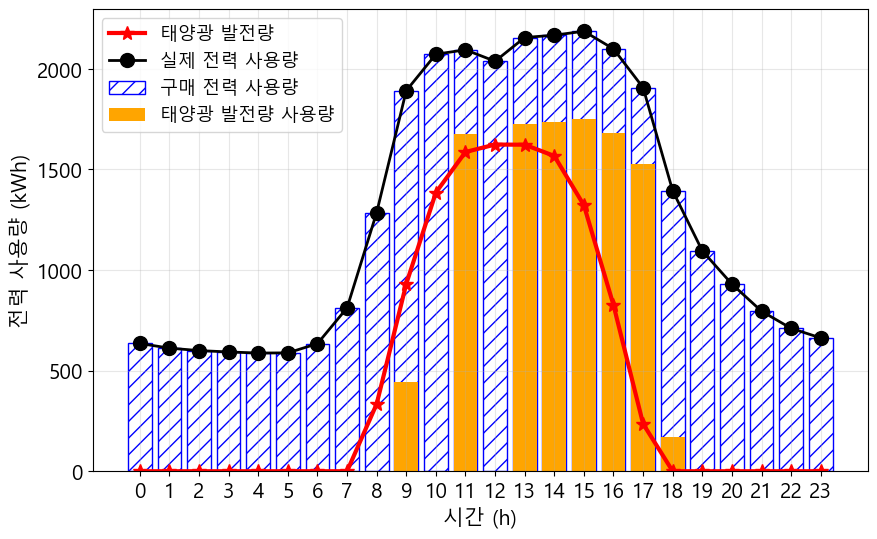

In [ ]:
hours = np.arange(24)
total_power = input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].values
solar_power = mc.results.ac.values
purchase_power = total_power - solar_power

plt.figure(figsize=(10, 6))
bar1 = plt.bar(hours, total_power, edgecolor='blue', hatch='//', color='white', label='구매 전력 사용량')  # 전체 전력 사용량 막대
bar2 = plt.bar(hours, df_results.loc[53]['BestPosition'],  color = 'orange',label='태양광 발전량 사용량')  
line = plt.plot(solar_power, linewidth = 3, color = 'r', marker = '*',markersize = 10, label = '태양광 발전량')
line2 = plt.plot(total_power, linewidth = 2, color = 'k', marker = 'o', markersize = 10, label = '실제 전력 사용량')

plt.legend(fontsize = 13)
plt.xlabel('시간 (h)', fontsize = 15)
plt.ylabel('전력 사용량 (kWh)', fontsize = 15)
plt.xticks(hours, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(alpha = 0.3)

plt.show()


In [ ]:
df_results[df_results['Weather']=='summer']

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
45,summer,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0754656368...",4.568020e+06,4.616281e+06,4.903102e+06,1.045439,48260.386299
46,summer,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1691.1...",3.897858e+06,4.042639e+06,4.903102e+06,3.581353,144781.158897
47,summer,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 393.95976234...",3.227695e+06,3.468997e+06,4.903102e+06,6.955957,241301.931495
48,summer,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 334.23169912332514...",2.588729e+06,2.895355e+06,4.903102e+06,10.590255,306625.464590
49,summer,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 676.953171336288, ...",2.167676e+06,2.321713e+06,4.903102e+06,6.634617,154036.741578
50,summer,1000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.2656...",4.566091e+06,4.614352e+06,4.901173e+06,1.045876,48260.386299
51,summer,3000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1724.5...",3.895929e+06,4.040710e+06,4.901173e+06,3.583062,144781.158897
52,summer,5000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1622.8829652...",3.225766e+06,3.467068e+06,4.901173e+06,6.959827,241301.931495
53,summer,7000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 444.77203427029434...",2.599260e+06,2.893426e+06,4.901173e+06,10.166682,294165.394115
54,summer,9000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1513.3137534246578...",2.178207e+06,2.319784e+06,4.901173e+06,6.103011,141576.671103


<Axes: xlabel='Company,Weather,Capacity'>

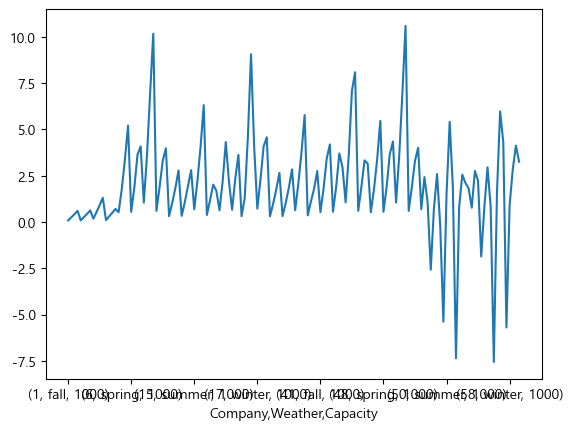

In [ ]:
df_results[df_results['Capacity'] < 8000].groupby(['Company','Weather','Capacity']).mean()['optimal_rate'].plot()